In [ ]:
# !pip install pandas
# !pip install matplotlib

  Using cached matplotlib-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Usi

In [69]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
# sns.set_palette('Set2')

In [47]:
df = pd.read_csv('./data/data.csv')
df.head()

,point_id,x,y,demand
0,DEPOT,0,0,0
1,TOWN_01,34,94,2
2,TOWN_02,40,89,4
3,TOWN_03,39,95,1
4,TOWN_04,47,94,4


In [48]:
# 선물 총 개수
sum(df['demand'])

287

x 좌표 크기: 0 100
y 좌표 크기: 0 100


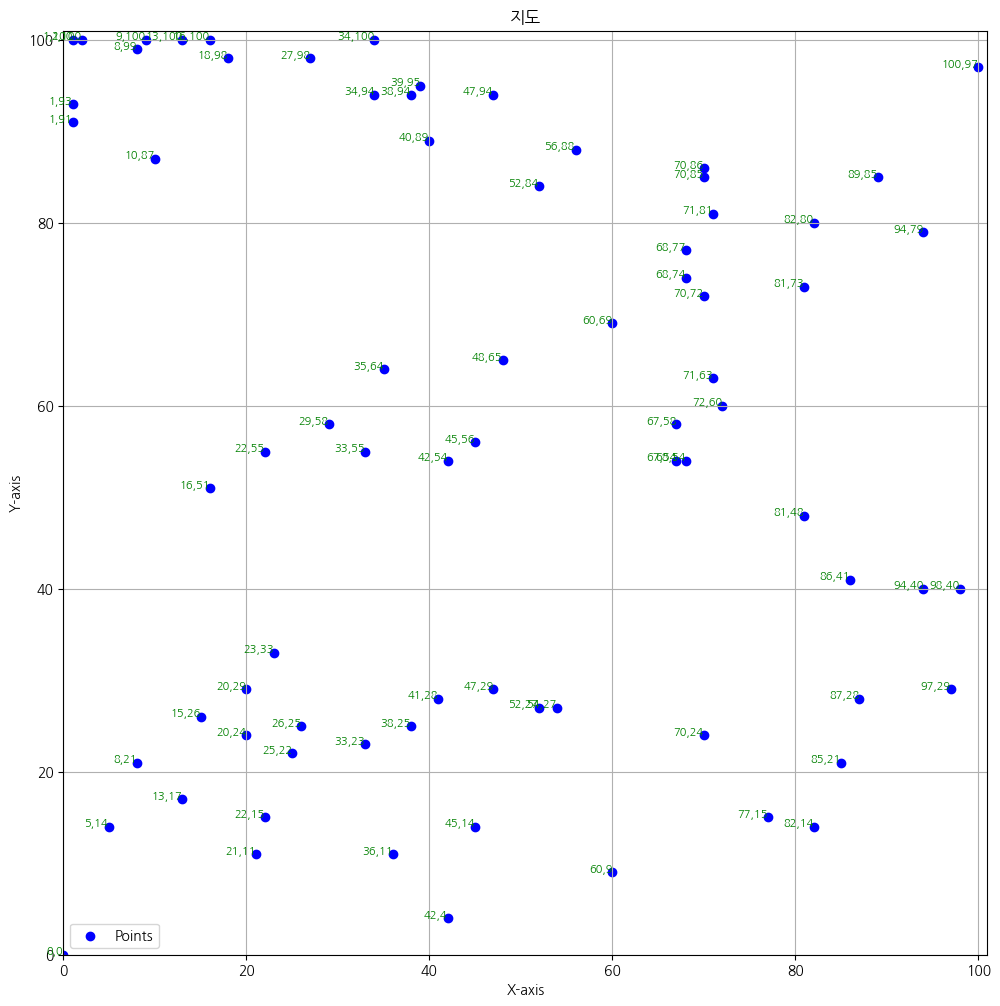

In [ ]:
# 배달지 지도 그려보기
print(f'x 좌표 크기: {min(df.x)} {max(df.x)}')
print(f'y 좌표 크기: {min(df.y)} {max(df.y)}')


# 좌표 리스트
home_list = []

for idx, (id, x, y, demand) in df.iterrows():
    home_list.append((x, y))

plt.figure(figsize=(12, 12))  # 그림 크기 설정

x_coords, y_coords = zip(*home_list)  # 좌표 분리
plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Points')  # 점 찍기


# 점마다 번호 표시 (선택 사항)
for i, (x, y) in enumerate(home_list):
    plt.text(x, y, f'{x},{y}', fontsize=8, ha='right', color='green')
        
# 그래프 설정
plt.xlim(0, 101)
plt.ylim(0, 101)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # 정사각형 비율 유지
plt.title("지도")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

In [ ]:
# 선물 신경쓰지 않고 최단 거리 구하기
# 1. 근사 알고리즘(Nearest Neighbor)

# 두 좌표 간 거리 계산
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Nearest Neighbor 알고리즘
def nearest_neighbor(coords):
    n = len(coords)
    visited = [False] * n
    path = [(0, 0)]  # 시작점은 첫 번째 좌표 (0, 0)
    visited[0] = True
    total_distance = 0

    for _ in range(n - 1):
        last = path[-1]
        nearest = None
        min_dist = float('inf')
        for i in range(n):
            if not visited[i]:
                dist = distance(coords[last], coords[i])
                if dist < min_dist:
                    min_dist = dist
                    nearest = i
        path.append(nearest)
        visited[nearest] = True
        total_distance += min_dist

    # 마지막으로 시작점으로 돌아감
    total_distance += distance(coords[path[-1]], coords[0])
    path.append(0)

    return path, total_distance

path, total_dist = nearest_neighbor(home_list)
print("최단 경로:", path)
print("최단 거리:", total_dist)

최단 경로: [0, 10, 30, 11, 12, 31, 68, 37, 41, 32, 13, 29, 58, 45, 40, 50, 38, 39, 65, 36, 63, 26, 27, 28, 25, 75, 52, 59, 70, 51, 47, 7, 73, 6, 9, 42, 61, 19, 57, 69, 55, 53, 8, 72, 71, 66, 67, 60, 4, 3, 74, 1, 5, 44, 64, 43, 23, 14, 20, 21, 24, 16, 22, 15, 2, 18, 48, 34, 33, 35, 62, 54, 46, 17, 56, 49, 0]
최단 거리: 768.504449071542


TypeError: 'int' object is not iterable

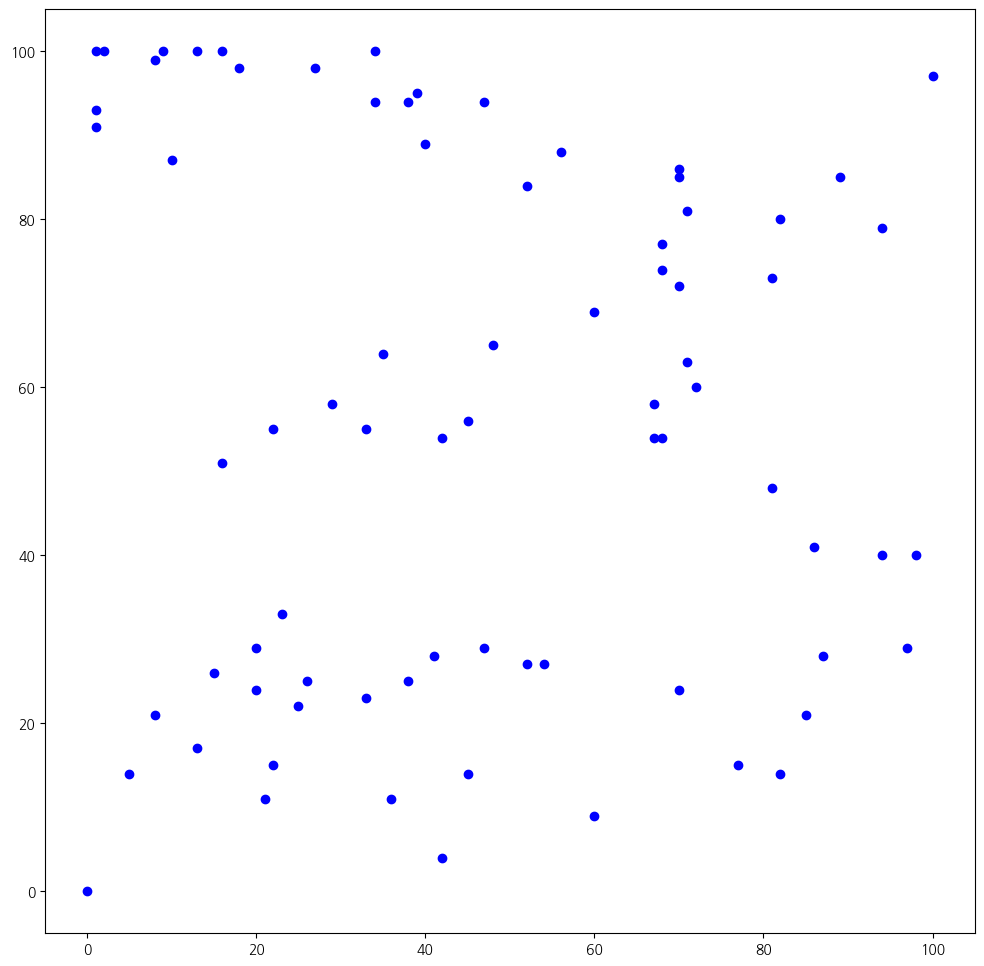

In [75]:
plt.figure(figsize=(12, 12))  # 그림 크기 설정

x_coords, y_coords = zip(*home_list)  # 좌표 분리
plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Points')  # 점 찍기
plt.plot(*zip(*path), c='red', label='Path')  # 경로 그리기

# 점마다 번호 표시 (선택 사항)
for i, (x, y) in enumerate(home_list):
    plt.text(x, y, f'{x},{y}', fontsize=8, ha='right', color='green')
        
# 그래프 설정
plt.xlim(0, 101)
plt.ylim(0, 101)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # 정사각형 비율 유지
plt.title("지도")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()